# Part I - Loan Data From Posper Dataset
## by Naufal Rakha Pratama

## Introduction
This data set consist of some variables for instance loan amount, loan status, borrower rate, borrower income and so many more. It contains 113937 loan data with 81 variables as been mentioned earlier. From these 81 variables, 15-18 variables have been chosen for further analysis. We would like to know each behavior of borrower as well as the loan variables which affects it. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [4]:
df.drop(['ListingKey','CreditGrade','ClosedDate','LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore','IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries','DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio','IncomeVerifiable','LoanKey', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments','InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount'],axis=1,inplace=True)

In [5]:
df.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,CurrentDelinquencies,AmountDelinquent,IncomeRange,StatedMonthlyIncome,PercentFunded,Recommendations,Investors
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0,CO,Other,Self-employed,2.0,2.0,472.0,"$25,000-49,999",3083.333333,1.0,0,258
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,2,CO,Professional,Employed,44.0,0.0,0.0,"$50,000-74,999",6125.000000,1.0,0,1
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0,GA,Other,Not available,NaN,1.0,NaN,Not displayed,2083.333333,1.0,0,41
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,16,GA,Skilled Labor,Employed,113.0,4.0,10056.0,"$25,000-49,999",2875.000000,1.0,0,158
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,2,MN,Executive,Employed,44.0,0.0,0.0,"$100,000+",9583.333333,1.0,0,20


In [6]:
df.dropna(subset=['Occupation','BorrowerState'],axis=0,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106221 entries, 0 to 113936
Data columns (total 18 columns):
ListingNumber                106221 non-null int64
ListingCreationDate          106221 non-null object
Term                         106221 non-null int64
LoanStatus                   106221 non-null object
BorrowerAPR                  106221 non-null float64
BorrowerRate                 106221 non-null float64
ListingCategory (numeric)    106221 non-null int64
BorrowerState                106221 non-null object
Occupation                   106221 non-null object
EmploymentStatus             106221 non-null object
EmploymentStatusDuration     103245 non-null float64
CurrentDelinquencies         106159 non-null float64
AmountDelinquent             103245 non-null float64
IncomeRange                  106221 non-null object
StatedMonthlyIncome          106221 non-null float64
PercentFunded                106221 non-null float64
Recommendations              106221 non-null int64
In

In [8]:
df.columns

Index(['ListingNumber', 'ListingCreationDate', 'Term', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'CurrentDelinquencies', 'AmountDelinquent',
       'IncomeRange', 'StatedMonthlyIncome', 'PercentFunded',
       'Recommendations', 'Investors'],
      dtype='object')

In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
10        False
12        False
13        False
14        False
15        False
16        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
32        False
          ...  
113905    False
113906    False
113907    False
113908    False
113909    False
113910    False
113911    False
113912    False
113913    False
113915    False
113916    False
113917    False
113918    False
113919    False
113920    False
113922    False
113923    False
113924    False
113925    False
113926    False
113927    False
113928    False
113929    False
113930    False
113931    False
113932    False
113933    False
113934    False
113935    False
113936    False
Length: 105409, dtype: b

In [11]:
df['AmountDelinquent']=df['AmountDelinquent'].astype(str)
df['AmountDelinquent']=df['AmountDelinquent'].str[:-2]
df['AmountDelinquent']=df['AmountDelinquent'].replace('n',np.nan)
df.dropna(subset=['AmountDelinquent'],axis=0,inplace=True)
df['AmountDelinquent']=df['AmountDelinquent'].astype(int)


### What is the structure of your dataset?
It is consisted of 18 variables as follow, ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration,CurrentDelinquencies, AmountDelinquent, IncomeRange,StatedMonthlyIncome, PercentFunded, Recommendations, and Investors. The data type for each variable is only integer,object and float type

### What is/are the main feature(s) of interest in your dataset?
Actually all of the variables could be built to investigate further about behavior for each borrower who loan the money

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
All of the features that has been selected will help me to support my investigation to look for behavior or type of people who borrow the money. For example, we could look relation of employment status with the amount of money to be borrowed, or from which region borrower tend to borrow the money.

## Univariate Exploration


### 1
What is the top 10 occupation of the borrower which mostly borrow the money?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

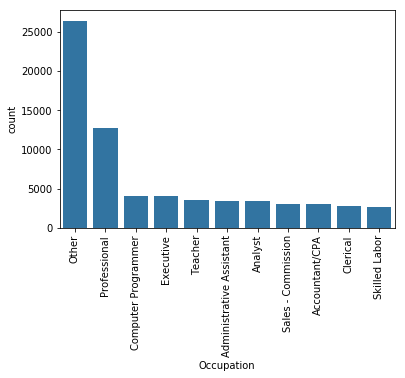

In [12]:
occuin=df['Occupation'].value_counts()[0:11].index
colin1=sb.color_palette()[0]
sb.countplot(data=df,x='Occupation',order=occuin,color=colin1)
plt.xticks(rotation=90)

Based on above bar chart, we could easily identify that most borrower who borrow the money has the occupation as other,professional,computer programmer, executive, teacher, administrative assistant, analyst, sales-commision, accountant, clerical and sales-retail respectively from top 1 to top 10

### 2

What is the distribution of monthly income for each borrower who borrow the money?

(0, 25000)

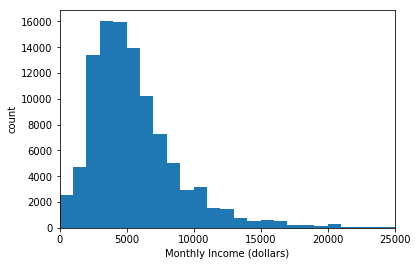

In [13]:
bins=np.arange(0,1.75*10**6+1000,1000)
plt.hist(data=df,x='StatedMonthlyIncome',bins=bins)
plt.xlabel('Monthly Income (dollars)')
plt.ylabel('count')
plt.xlim(0,25000)

In [14]:
df['StatedMonthlyIncome'].describe()

count    1.024330e+05
mean     5.711816e+03
std      7.708006e+03
min      0.000000e+00
25%      3.333333e+03
50%      4.833250e+03
75%      6.965000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

Based on above histogram, we could clearly see that the this histogram is right skewed, and mostly the borrower monthly income is around 4000-5000 dollars. There is also found an outlier since if we do calculate the statistic data, there is someone who borrow the money whose monthly income is up to 1750000 dollars. Yet since the quantity is tiny, we do some scaling by limit the x axis to 25000, therefore the data could be read well.

### 3

In [15]:
df['EmploymentStatus'].value_counts()

Employed         66598
Full-time        24861
Self-employed     5945
Other             2469
Part-time          998
Not employed       800
Retired            762
Name: EmploymentStatus, dtype: int64

What is the borrower employment type status?

(-1.1271105248876117,
 1.1074691934982241,
 -1.1107873604398626,
 1.1237923579459732)

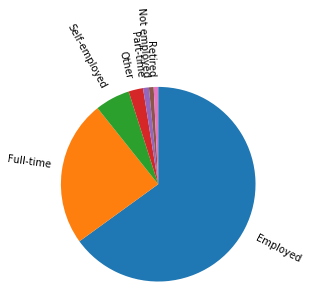

In [16]:
typeemp3=df['EmploymentStatus'].value_counts()
plt.pie(typeemp3,labels=typeemp3.index,startangle=90,counterclock=False,rotatelabels=True)
plt.axis('square')

In [17]:
typeemp3/typeemp3.sum()

Employed         0.650162
Full-time        0.242705
Self-employed    0.058038
Other            0.024104
Part-time        0.009743
Not employed     0.007810
Retired          0.007439
Name: EmploymentStatus, dtype: float64

According to above pie chart, we could clearly see that the most borrower if we categorized it by employment status is employed type with the percentage of 63%, then in second place it is followed by full time type with 23.6 %, and next followed by self-employed,not available,other,part-time, not employed and retired with percentage of 5.6%,2.8%,2.3%,0.9%,0.7% and 0.7% respectively.

### 4

What is the proportions for each loan status type in this data set? Has almost the loan fully finished/completed?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

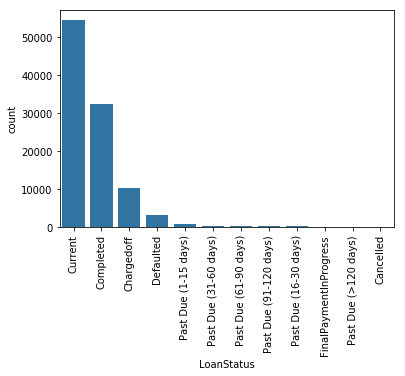

In [18]:
ols4=df['LoanStatus'].value_counts()
col4=sb.color_palette()[0]
sb.countplot(data=df,x='LoanStatus',order=ols4.index,color=col4)
plt.xticks(rotation=90)

In [19]:
ols4/ols4.sum()

Current                   0.531899
Completed                 0.316021
Chargedoff                0.099841
Defaulted                 0.030312
Past Due (1-15 days)      0.007742
Past Due (31-60 days)     0.003475
Past Due (61-90 days)     0.003036
Past Due (91-120 days)    0.002968
Past Due (16-30 days)     0.002577
FinalPaymentInProgress    0.001962
Past Due (>120 days)      0.000156
Cancelled                 0.000010
Name: LoanStatus, dtype: float64

Based on above bar chart, most of the loan status in this data set still on progress/current with the total percentage of 51.68%, then in second place it is followed by completed status with the percentage of 32 %, in the third place is chargedoff 10.3% and fourth place status is defaulted with 3.8 %. The rest of status is below 1 % with several status such as past due, final payment in progess and cancelled.

### 5

How much the highest borrower rate ever given to borrower?

Text(0.5,0,'Borrower Rate')

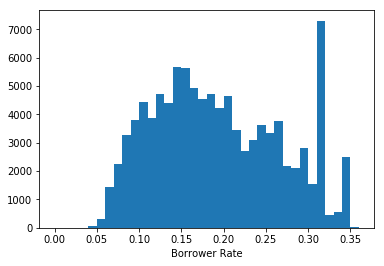

In [20]:
bins=np.arange(0,0.36+0.01,0.01)
plt.hist(data=df,x='BorrowerRate',bins=bins)
plt.xlabel('Borrower Rate')

According to above histogram chart, the highest borrower rate could be found in the range of 0.30 - 0.33. The histogram distribution of this borrower rate is quite normal, yet after the value of 0.30 it is found highest count of borrower rate as mentioned earlier

### 6

What is the mainly reason of borrower for deciding to borrow the money?

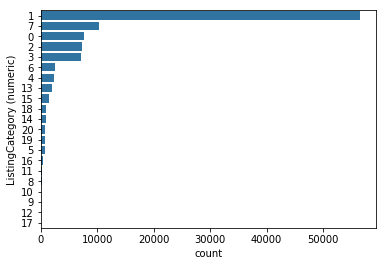

In [21]:
lc6=df['ListingCategory (numeric)'].value_counts()
col6=sb.color_palette()[0]
sb.countplot(data=df,y='ListingCategory (numeric)',order=lc6.index,color=col6)

Based on above bar chart, the main reason of borrower to borrow the money is debt consolidation, next in the second place with the count quantity of around 10000 is not mentioned the reason/not available, in the third place is other, then home improvement and 5th place is for business purposes.

### 7

How much the highest amount of delinquent for those borrowers who don't pay for it?

In [22]:
dfad=df.query('AmountDelinquent!=0')
np.log10(dfad['AmountDelinquent'].describe())

count    4.193820
mean     3.807489
std      4.240143
min      0.000000
25%      2.387390
50%      3.026942
75%      3.708251
max      5.666407
Name: AmountDelinquent, dtype: float64

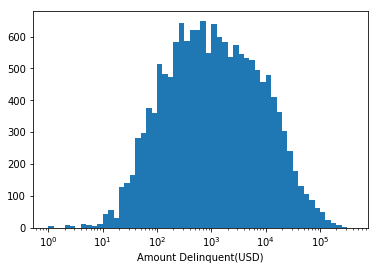

In [23]:
bins=10**(np.arange(0,5.6+0.1,0.1))
plt.hist(data=dfad,x='AmountDelinquent',bins=bins)
plt.xlabel('Amount Delinquent(USD)')
ticks=[0,1,3,10,30,100,300,1000,3000,10000,30000,100000]
plt.xticks(ticks,ticks)
plt.xscale('log')

According to above histogram, the distribution of amount delinquent data is normal. Since there is 0 value in amount of delinquent and we just only need the amount of delinquent, we need to filter the value first, then we plot the histogram and it is also used scale transformation by using log, therefore the data could be distributed well. Move to the content of histogram, we could clearly see that mostly the amount delinquent value is around 100-1000 USD

### 8

What is the top 10 address/state of the borrowers who mostly borrow the money? 

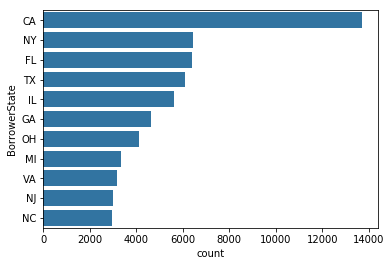

In [24]:
bs8=df['BorrowerState'].value_counts()[0:11]
col8=sb.color_palette()[0]
sb.countplot(data=df,y='BorrowerState',order=bs8.index,color=col8)

Based on above bar chart, here is the top 10 of state/address which mostly the borrower come from, California with the count of almost 14000, then New York,Florida,Texas,Illnois,Georgia,Ohio,Michigan,Virginia,New Jersey and North Carolina respectively. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
When we look on the histogram chart, the distribution from the data set which exist is only the normal distribution and right skewed type. The normal distribution could be found in the variable of Amount Delinquent and Borrower Rate. Important point to be noted is on the histogram of Amount Delinquent, it is necessary to transform and scale the variable into log, therefore the distribution of it could be read well. And on the histogram of borrower rate, found that the highest borrower rate not follow the normal distribution, it could be found after the peak/mode of the data. And for right skewed type of histogram is found on histogram with variable of monthly income

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We need to the adjustment when exploring the data, for example i will inform one case of it. When exploring in variable of amount delinquent, since we would like to search the existing value of it (except 0), we need to filter and make query within the data, to achieve the data content without 0. And also we convert the data type of this pandas series and drop the nan value, to make the data could be easier when interpreting it.

## Bivariate Exploration


### 9

We would like to see the relationship between amount of delinquent and monthly income. If the monthly income of borrower higher, is the amount of delinquent will be reduced? is there any correlation between these two?

(0, 100000)

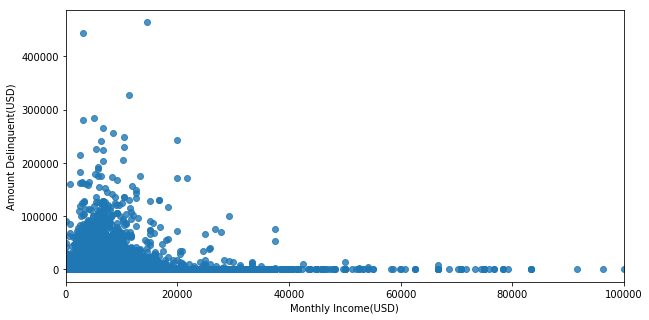

In [25]:
plt.figure(figsize=[10,5])
sb.regplot(data=df,x='StatedMonthlyIncome',y='AmountDelinquent',fit_reg=False)
plt.xlabel('Monthly Income(USD)')
plt.ylabel('Amount Delinquent(USD)')
plt.xlim(0,100000)

According to above scatter plot, before we jump to main content, it is found that there is outlier in 1750000 monthly income. Therefore I limit the x axis to see the data clearer. The result of this scatter plot is similar with the initial question given. We could see that the data variable of amount deliquency has tendency to be lower with the increase value of borrowers monthly income. It does make sense if the borrower has higher income, they could pay the deliquent therefore they don't have any debt anymore. However it is still found that some borrowers whose income is higher has higher debt as well.

### 10

In [26]:
df['EmploymentStatusDuration']=df['EmploymentStatusDuration'].astype(str)
df['EmploymentStatusDuration']=df['EmploymentStatusDuration'].str[:-2]


In [27]:
df['EmploymentStatusDuration']=df['EmploymentStatusDuration'].replace('n',np.nan)
df.dropna(subset=['EmploymentStatusDuration'],axis=0,inplace=True)
df['EmploymentStatusDuration']=df['EmploymentStatusDuration'].astype(int)

We would like to see relation between recommendations and the duration of borrower who has employed. Does it mean with longer employment the borrower will get much more recommendation when borrowing the money?

Text(0,0.5,'Recommendations Value')

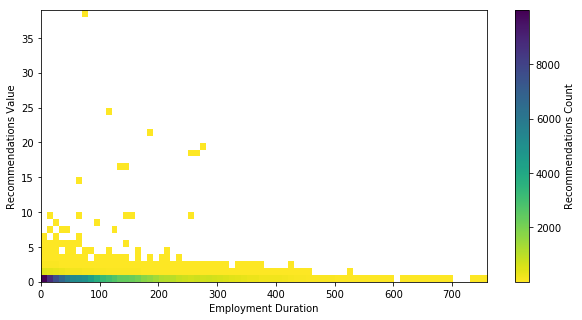

In [28]:
plt.figure(figsize=[10,5])
binsx=np.arange(0,755+10,10)
binsy=np.arange(0,39+1,1)
plt.hist2d(data=df,x='EmploymentStatusDuration',y='Recommendations',bins=[binsx,binsy],cmin=1,cmap='viridis_r')
plt.colorbar(label='Recommendations Count')
plt.xlabel('Employment Duration')
plt.ylabel('Recommendations Value')

In [29]:
df['EmploymentStatusDuration'].describe()
df['Recommendations'].describe()

count    102416.000000
mean          0.050187
std           0.342673
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: Recommendations, dtype: float64

According to above heatmap chart, the result of it is very diverse if compared with the initial/earlier question. We could see from the heatmap that the higher duration of borrower being employed, the less recommendations that they got.

### 11

We would like to know whether some area/state has different kind of mean rate by comparing between data of borrower rate and borrower state. Is there any linking between these two?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

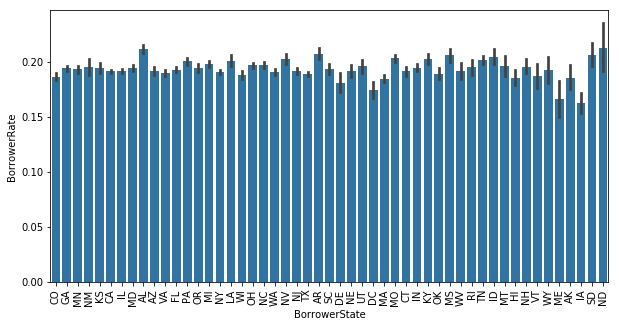

In [30]:
plt.figure(figsize=[10,5])
col11=sb.color_palette()[0]
sb.barplot(data=df,x='BorrowerState',y='BorrowerRate',color=col11)
plt.xticks(rotation=90)

According to above barplot, we could see and summarize that the highest mean of borrower rate comes from the state of North Dakota with around 0.212 proportion, then next in second place is Alabama with 0.211 proportions. Most of the proportions/rate mean of top 10 state in USA have value of around 0.20.

In [31]:
df.groupby('BorrowerState')['BorrowerRate'].mean().sort_values(ascending=False)

BorrowerState
ND    0.212940
AL    0.211778
AR    0.207512
MS    0.206285
SD    0.206132
ID    0.204813
MO    0.203282
NV    0.202611
KY    0.202547
TN    0.201660
LA    0.201043
PA    0.200563
MI    0.198319
NC    0.197498
OH    0.197075
MT    0.196589
UT    0.196329
NH    0.195811
NM    0.195263
RI    0.195137
IN    0.194807
OR    0.194701
MD    0.194535
KS    0.194456
GA    0.194165
SC    0.193786
MN    0.193192
FL    0.193103
WY    0.192909
NJ    0.192032
WV    0.191998
IL    0.191830
NE    0.191775
AZ    0.191667
CA    0.191527
CT    0.191368
NY    0.190604
WA    0.190513
VA    0.189601
OK    0.189372
TX    0.189124
WI    0.188121
VT    0.186905
CO    0.186345
AK    0.185832
HI    0.185819
MA    0.184577
DE    0.181317
DC    0.174079
ME    0.166090
IA    0.163141
Name: BorrowerRate, dtype: float64

### 12

We would like to also know regarding relation between what the borrower do for the money that they've got and their income range. Do people who borrow the money for business purposes has higher income? or is there any specific thing which related to their income range?

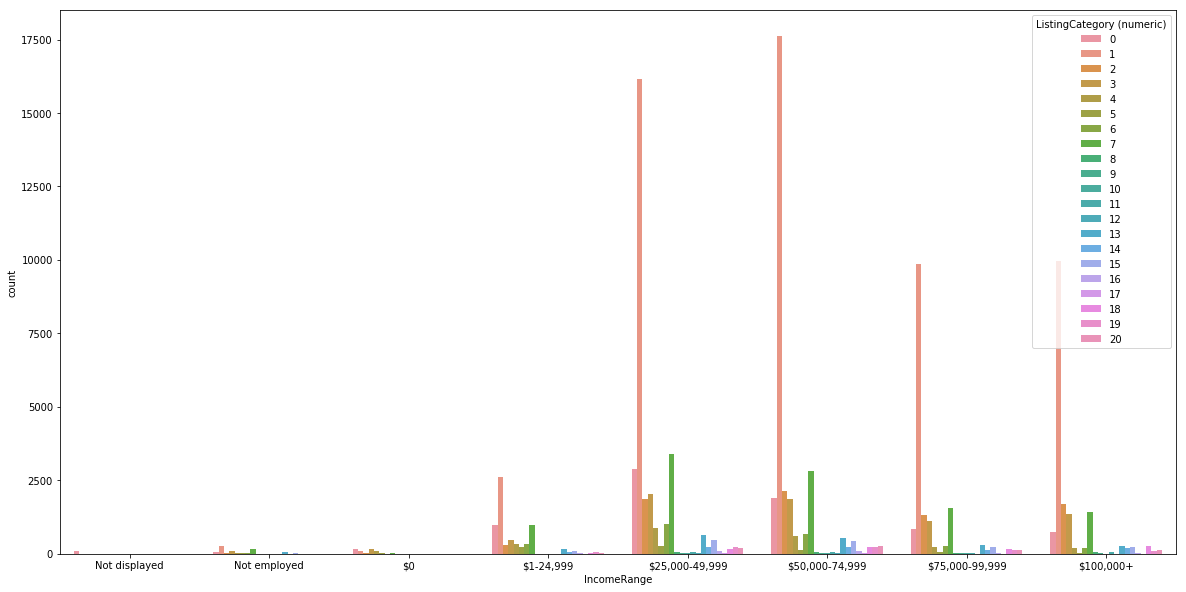

In [32]:
lclass=['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
lc=pd.api.types.CategoricalDtype(ordered=True,categories=lclass)
df['IncomeRange']=df['IncomeRange'].astype(lc)
plt.figure(figsize=[20,10])
sb.countplot(data=df,x='IncomeRange',hue='ListingCategory (numeric)')


In [33]:
df['IncomeRange'].value_counts()

$25,000-49,999    30683
$50,000-74,999    30010
$100,000+         16985
$75,000-99,999    16509
$1-24,999          6749
Not employed        779
$0                  600
Not displayed       101
Name: IncomeRange, dtype: int64

Based on above chart, we could clearly see that most of the borrower, no matter their how much their income range, the reason why they mostly borrow the money is because of debt consolidation purposes, then it is followed by another reason such as business, home improvement, other/not mentioned reason, not available reason etc. The highest debt consolidation proposal comes from borrower whose income range between $50,000-74,999. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is an interesting fact between relation of variable of borrower income range and listing category/The reason why borrower borrow the money. Based on the clustered bar chart, most of the borrower no matter how much they earning on their income, like to borrow the money because of debt consolidation purposes. And the highest proposal debt consolidation comes from borrower whose income range between $50,000-74,999. And another top reason why they borrow the money for doing business, and home improvement. Another example that we could look for is the relation between amount of delinquent and monthly income of the borrower. The higher monthly income of the borrower, the lower amount of delinquent become. It does make sense, since they have ability to pay the delinquent since they have much more money.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In the relation variable between borrower rate and borrower state, based on observation which taken place on the clustered bar chart, we know that the highest borrower rate comes from North Dakota State. It could be due to some reasons, one of it such as credit score. If it is lower, it makes the loan rate become higher than usual. There is possibility that most people who borrow the money in North Dakota has lower credit score.

## Multivariate Exploration


### 13

We would like to look for the relation between amount of delinquent and monthly income of borrower if its categorized by borrower status of employment. Do borrower who aren't employed tend to has higher amount of delinquent and also lower monthly income?

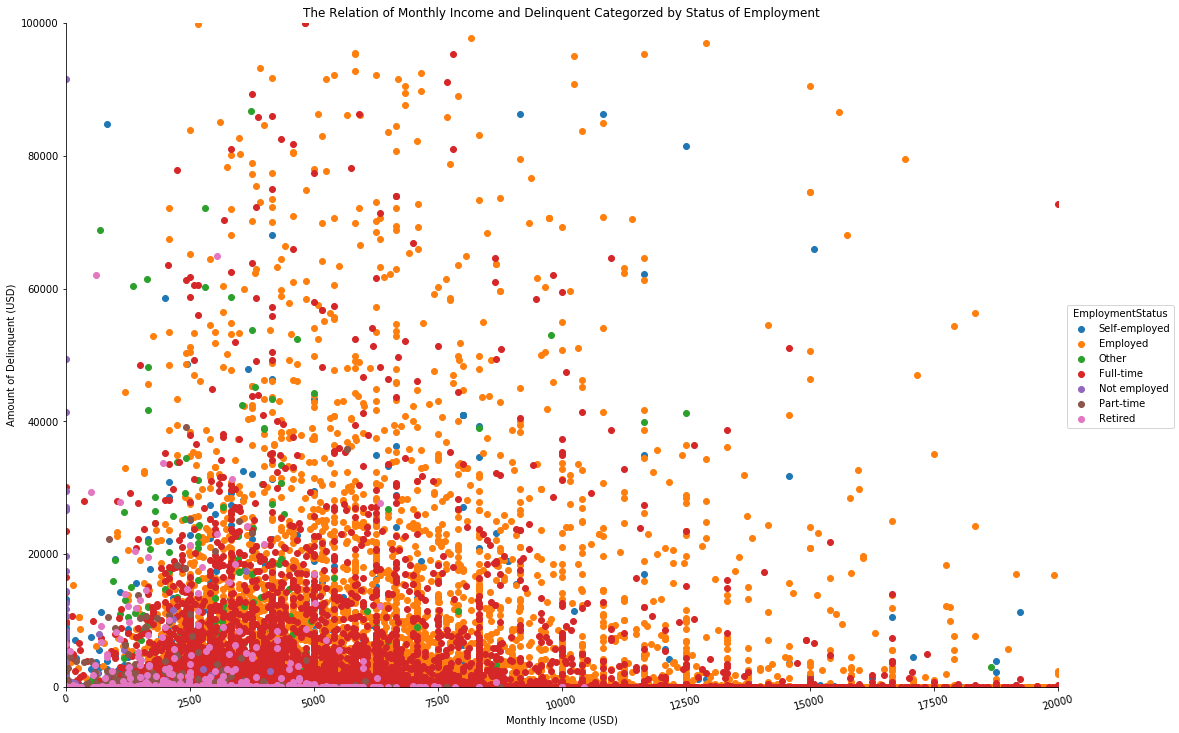

In [34]:
g=sb.FacetGrid(data=df,hue='EmploymentStatus',size=10,aspect=1.5)
g.map(plt.scatter,'StatedMonthlyIncome','AmountDelinquent')
plt.xticks(rotation=15)
g.add_legend()
plt.xlim(0,20000)
plt.ylim(0,100000)
def xytitle(xL,yL,title):
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.title(title)
    
xytitle('Monthly Income (USD)','Amount of Delinquent (USD)','The Relation of Monthly Income and Delinquent Categorzed by Status of Employment')


According to above multivariate plot between monthly income, amount of delinquent and employment status, We could know that the higher monthly income, it will result in the lower of amount delinquent. And if this condition connected to borrower status employment, the employed borrower tends to have higher amount of delinquent and higher quantity of the borrower from any other type of employment. Then in second place is followed by full time borrower, there are also some full timer whose amount delinquent as high as employed type yet the data not so many and so spread as employed type. And there is also small amount of selm-employed borrower whise amount of delinquent is as high as the two type borrowers (employed and full time) however the quantity is very tiny. Laslty the retired type of borrower has lower amount of delinquent if it s compared to full time, employed and self employed.

### 14

Is there any connection between borrower rate, employment status duration and amount of delinquent? With the higher value of borrower rate, does it mean the amount of delinquent will be higher as well? and how about if these two connected with duration of employment?

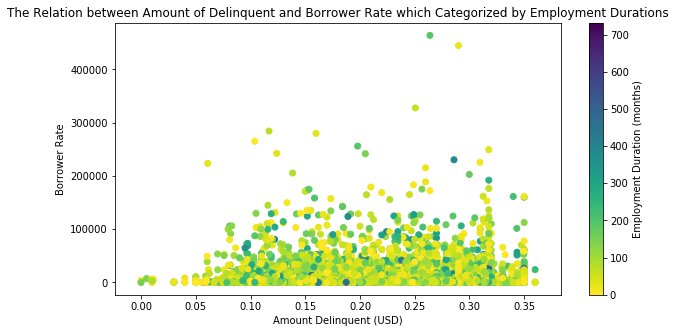

In [35]:
plt.figure(figsize=[10,5])
plt.scatter(data=dfad,x='BorrowerRate',y='AmountDelinquent',c='EmploymentStatusDuration',cmap='viridis_r')
plt.colorbar(label='Employment Duration (months)')
xytitle('Amount Delinquent (USD)','Borrower Rate','The Relation between Amount of Delinquent and Borrower Rate which Categorized by Employment Durations')

Based on above chart, we could see clearly that the higher amount of delinquent that owned by borrower, the borrower rate will be likely to increase as well. It has slight positive trend betwwen Amount of Delinquent and Borrower Rate. And if these two variables are compared with duration of employment, this variable seems to spread all over each point in variable of delinquent amount. Based on this fact, we could restate that the employment duration clearly doesn't have any correlation with another two variables, since both longer or shorter employment duration has variety of amount of delinquent as well as borrower rate.

### 15

is there any correlation between borrower state, term and employment status? Are borrowers most likely borrow the money if the employment status is stable? And also from which state most likely the borrower borrow the money with longer term?

In [ ]:
plt.figure(figsize=[20,10])
sb.barplot(data=df,x='EmploymentStatus',y='Term',hue='BorrowerState')
xytitle('Status of Employment','Term (months)','Correlation Between EMployment Status, Terms and State of Borrower')


According to above chart, we could clearly see that employed borrower has the highest mean term when borrowing the money (Mean data from all the state), then in second place is follwed by other type borrower, and the third one comes from self employed type borrower.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

When we look the correlation of variables between amount of delinquent, monthly income and borrower status of employment, the trend has tendency for having slight negative trend, and its strengthened each other in the case of relation of these 3 variables. The higher of monthly income, the lower amount of deliquent and mostly the employed type borrower has the highest correlation between these two variables.


### Were there any interesting or surprising interactions between features?

In the relation of delinquent amount, borrower rate and employment duration, there is surprising fact that eventhough the higher of borrower rate value will make the delinquent amount will be higher as well, the employment duration doesn't have any impact on these two variables. Logically, the lower amount of deliquency will be owned by borrower which duration of employment higher, since we thought that borrower with higher duration of employment tends to have more money to pay the deliquent. Yet, the duration of employment spread all over the value of amount of deliquency both longer or shorter duration.

## Conclusions


From this loan data set, there is some interesting point to be noted especially when it comes to the variable of monthly income, amount of delinquent, employment status. If we refer to univariate exploration most the borrower has monthly income around 5000 US Dollars, and also the employment status which mostly borrow the money is employed type borrower. Then if we look to multivariate plot of these variables by adding amount of delinquent as the third variable, we could summarize that the higher monthly income of borrower, the amount of delinquent will be lower and employed type borrower which has the most spread data, as well as the highest monthly income and amount of delinquent.


In [ ]:
df.to_csv('forexplanatory.csv',index=False)